In [ ]:
### Data Cleanning

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time
import timeit

import scipy.stats 
import pandas as pd
import pymc as pm


import scipy as sp
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from IPython.display import Image

In [5]:
# This function is to conver the string into int
def Str2float(string):
    try:
        return float(string)
    except:
        return "NaN"

In [251]:
#import 2011
game11_df = pd.read_csv('10-11game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game11_df['Year'] = 2011
game11_df['PTS'] = game11_df['PTS'].map(lambda x: Str2float(x))
game11_df['PTS'] = game11_df['PTS.1'].map(lambda x: Str2float(x))
game11_df = game11_df[game11_df['PTS'].map(lambda x: type(x) is float)]

In [213]:
#import name and their teams 
playerTeam_df = pd.read_csv('salary.csv', header = 1)[['Player','Tm']]
playerTeam_df = playerTeam_df[playerTeam_df['Tm'] != 'Tm']
playerTeam_df = playerTeam_df[playerTeam_df['Player'] != 'Player']
playerTeam_df = playerTeam_df[~pd.isnull(playerTeam_df['Player'])]

In [214]:
#import 2012
game12_df = pd.read_csv('11-12game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game12_df['Year'] = 2012
game12_df['PTS'] = game12_df['PTS'].map(lambda x: Str2float(x))
game12_df['PTS'] = game12_df['PTS.1'].map(lambda x: Str2float(x))
game12_df = game12_df[game12_df['PTS'].map(lambda x: type(x) is float)]

In [215]:
#import 2013
game13_df = pd.read_csv('12-13game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game13_df['Year'] = 2013
game13_df['PTS'] = game13_df['PTS'].map(lambda x: Str2float(x))
game13_df['PTS'] = game13_df['PTS.1'].map(lambda x: Str2float(x))
game13_df = game13_df[game13_df['PTS'].map(lambda x: type(x) is float)]

In [216]:
#import 2014
game14_df = pd.read_csv('13-14game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game14_df['Year'] = 2014
game14_df['PTS'] = game14_df['PTS'].map(lambda x: Str2float(x))
game14_df['PTS'] = game14_df['PTS.1'].map(lambda x: Str2float(x))
game14_df = game14_df[game14_df['PTS'].map(lambda x: type(x) is float)]

In [217]:
#import 2015
game15_df = pd.read_csv('14-15game_stats.csv')[["Visitor/Neutral", "PTS", "Home/Neutral", "PTS.1"]]
game15_df['Year'] = 2015
game15_df['PTS'] = game15_df['PTS'].map(lambda x: Str2float(x))
game15_df['PTS'] = game15_df['PTS.1'].map(lambda x: Str2float(x))
game15_df = game15_df[game15_df['PTS'].map(lambda x: type(x) is float)]

In [219]:
game_all_df=pd.concat([game11_df,game12_df,game13_df,game14_df,game15_df])

In [220]:
Team_names=game_all_df['Visitor/Neutral'].drop_duplicates()
Team_names=list(Team_names)
Team_names[7]

'Atlanta Hawks'

In [231]:
Team_Score = np.zeros(33)
for i in range(33):
    Full_Score=np.append( np.array(Visitor_Score.get_group(Team_names[i])['PTS']), np.array(Home_Score.get_group(Team_names[i])['PTS']) )
    print Team_names[i], np.mean(Full_Score)

Miami Heat 99.0913705584
Houston Rockets 104.850253807
Phoenix Suns 103.225888325
Boston Celtics 97.9567430025
Charlotte Bobcats 97.7435897436
Utah Jazz 100.14213198
Portland Trail Blazers 101.573604061
Atlanta Hawks 98.6852791878
Sacramento Kings 103.822335025
Detroit Pistons 99.6446700508
Milwaukee Bucks 98.269035533
Chicago Bulls 95.4695431472
Indiana Pacers 98.1857506361
New York Knicks 100.47715736
Washington Wizards 99.9568527919
Memphis Grizzlies 96.8045685279
Oklahoma City Thunder 103.814720812
Los Angeles Clippers 102.279187817
Orlando Magic 98.4060913706
Denver Nuggets 106.053299492
Los Angeles Lakers 102.565989848
Cleveland Cavaliers 100.558375635
Philadelphia 76ers 98.6725888325
Minnesota Timberwolves 102.939086294
New Orleans Hornets 95.1
Dallas Mavericks 101.763959391
Golden State Warriors 104.126903553
San Antonio Spurs 102.187817259
Toronto Raptors 100.42893401
New Jersey Nets 97.4594594595
Brooklyn Nets 99.0975609756
New Orleans Pelicans 101.81097561
Charlotte Hornets 

In [815]:
Visitor_Score=game_all_df.groupby(['Visitor/Neutral'])
Home_Score=game_all_df.groupby(['Home/Neutral'])
for i in range(len(Team_names)):
    plt.figure(figsize=(7, 5)) 
    a=np.histogram(np.append( np.array(Visitor_Score.get_group(Team_names[i])['PTS']), np.array(Home_Score.get_group(Team_names[i])['PTS']) ),bins=np.arange(50,150,5),normed=True)
    #plt.plot(np.arange(52.5,147.5,5),a[0],'ro')
    #plt.title(Team_names[i])

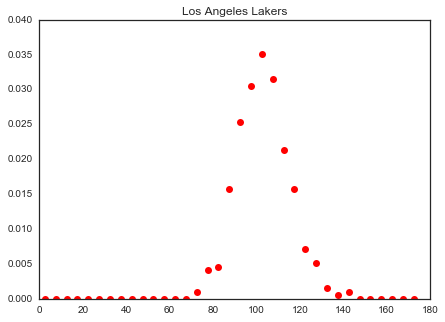

In [252]:
Visitor_Score=game_all_df.groupby(['Visitor/Neutral'])
Home_Score=game_all_df.groupby(['Home/Neutral'])
plt.figure(figsize=(7, 5)) 
team=20
AllScore=np.append( np.array(Visitor_Score.get_group(Team_names[team])['PTS']), np.array(Home_Score.get_group(Team_names[team])['PTS'])) 
a=np.histogram( AllScore ,bins=np.arange(0,180,5),normed=True)
plt.plot(np.arange(2.5,177.5,5),a[0],'ro')
plt.title(Team_names[team])

mean of lambda is 99.1056035024


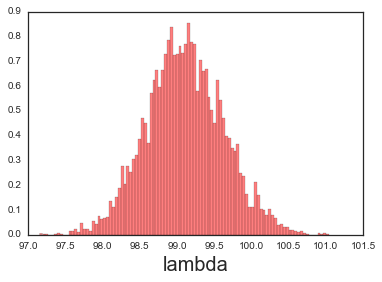

In [208]:
burnin=500
fig=plt.hist(trace[burnin:],bins=100,normed = True,color='r',alpha=0.5);
plt.xlabel('lambda',fontsize=20)
print "mean of lambda is", trace[burnin:].mean()

In [435]:
Age_Score_13=pd.read_csv('./raw-data/13-14Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_13['PTS'] = Age_Score_13['PTS'].map(lambda x: Str2float(x))
Age_Score_13 = Age_Score_13[Age_Score_13['PTS'].map(lambda x: type(x) is float)]

In [ ]:
Age_Score_13=pd.read_csv('./raw-data/13-14Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_13['PTS'] = Age_Score_13['PTS'].map(lambda x: Str2float(x))
Age_Score_13 = Age_Score_13[Age_Score_13['PTS'].map(lambda x: type(x) is float)]

In [595]:
Age_Games_6=pd.read_csv('./raw-data/5-6Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_7=pd.read_csv('./raw-data/6-7Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_8=pd.read_csv('./raw-data/7-8Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_9=pd.read_csv('./raw-data/8-9Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_10=pd.read_csv('./raw-data/9-10Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_11=pd.read_csv('./raw-data/10-11Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_12=pd.read_csv('./raw-data/11-12Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_13=pd.read_csv('./raw-data/12-13Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_14=pd.read_csv('./raw-data/13-14Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_15=pd.read_csv('./raw-data/14-15Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_16=pd.read_csv('./raw-data/15-16Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')

Age_Games_6['G'] = Age_Games_6['G'].map(lambda x: Str2float(x))
Age_Games_6 = Age_Games_6[ Age_Games_6['G'].map(lambda x: type(x) is float)]


Score_all=pd.concat([Age_Games_6,Age_Games_7,Age_Games_8,Age_Games_9,Age_Games_10,Age_Games_11,Age_Games_12,Age_Games_13,Age_Games_14,Age_Games_15,Age_Games_16])
Score_all['G'] = Score_all['G'].map(lambda x: Str2float(x))
Score_all = Score_all[Score_all['G'].map(lambda x: type(x) is float)]

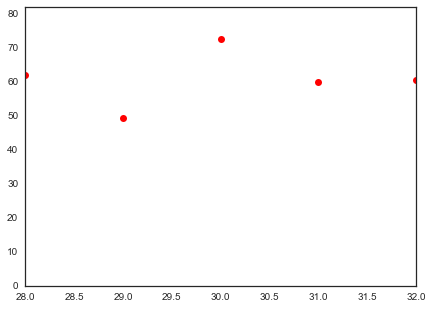

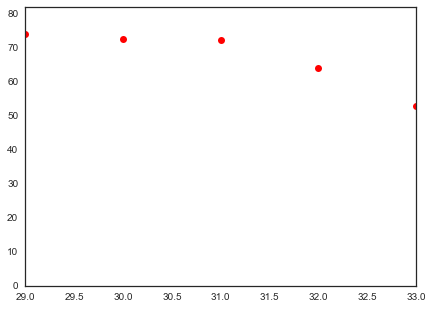

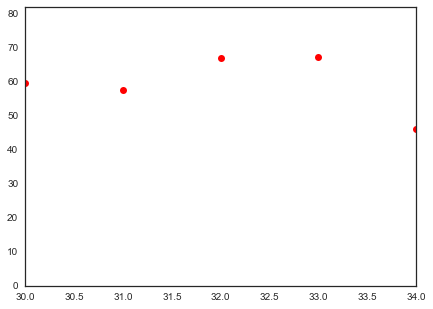

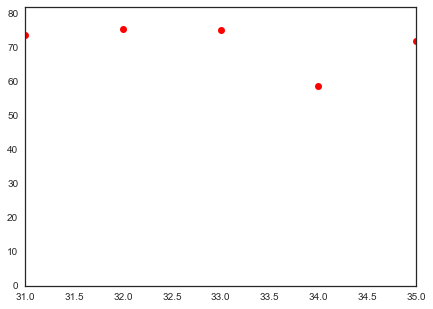

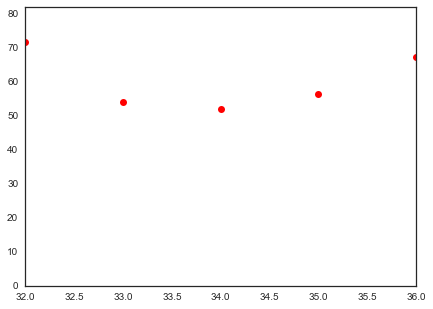

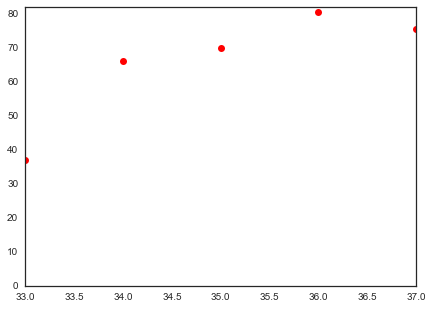

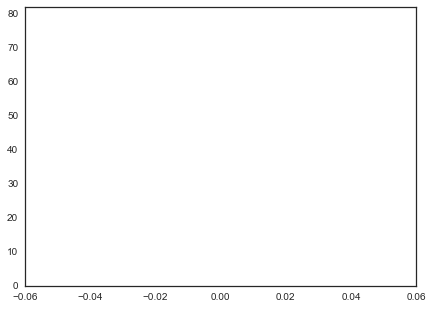

In [602]:
total_years=5
for age in range(28,35):
    Age_Games_6_GbyA=Age_Games_6.groupby(['Age'])
    PlayerList=list( Age_Games_6_GbyA.get_group(str(age))['Player'] )

    SumGame=np.zeros(total_years)
    NumPlayers=0
    plt.figure(figsize=(7, 5)) 
    for i in range(len(PlayerList)): 
        playyears=len(Score_all_GbyP.get_group(PlayerList[i])['G'])
        if playyears>total_years:
            Score_all_GbyP=Score_all.groupby(['Player'])
            SumGame= SumGame + np.array( Score_all_GbyP.get_group(PlayerList[i])['G'] )[:total_years]
            NumPlayers+=1
    plt.plot(np.arange(age,age+total_years),SumGame/NumPlayers,'ro')
    plt.ylim(0,82)

In [632]:
Age_Games_16=pd.read_csv('./raw-data/15-16Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')

In [636]:
Age_Games_16=pd.read_csv('./raw-data/15-16Per100Pos_stats.csv')[["Player", "Age", "G"]].drop_duplicates('Player')
Age_Games_16['G'] = Age_Games_16['G'].map(lambda x: Str2float(x))
Age_Games_16 = Age_Games_16[ Age_Games_16['G'].map(lambda x: type(x) is float)]

Age_Games_16
Age_Games_16_GbyA=Age_Games_16.groupby(['Age'])
PlayerList=list( Age_Games_16_GbyA.get_group('35')['Player'] )
PlayerList

['Matt Barnes',
 'Steve Blake',
 'Matt Bonner',
 'Caron Butler',
 'Nick Collison',
 'Jamal Crawford',
 'Mike Dunleavy',
 'Pau Gasol',
 'Udonis Haslem',
 'Kirk Hinrich',
 'Richard Jefferson',
 'Dahntay Jones',
 'James Jones',
 'Mike Miller',
 'Tayshaun Prince',
 'Luis Scola',
 'David West']

In [740]:
Duncan = pd.read_csv('14-15Tim Duncan.csv')[["PTS"]].replace('Did Not Play','-1')
Duncan['PTS'] = Duncan['PTS'].map(lambda x: Str2float(x))
Duncan = Duncan[ Duncan['PTS'].map(lambda x: type(x) is float)]

Duncan['PTS']
Duncan['MP'] = Duncan['MP'].map(lambda x: Str2float(x))
Duncan = Duncan[Duncan['MP'].map(lambda x: type(x) is float)]

In [560]:
SumGame=np.zeros(10)
NumPlayers=0
for i in range(len(PlayerList)): 
    playyears=len(Score_all_GbyP.get_group(PlayerList[i])['G'])
    if playyears==10:
        Score_all_GbyP=Score_all.groupby(['Player'])
        SumGame= SumGame + np.array( Score_all_GbyP.get_group(PlayerList[i])['G'] )
        NumPlayers+=1

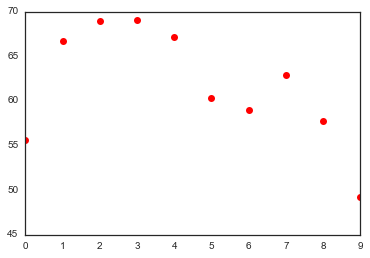

In [561]:
plt.plot(SumGame/NumPlayers,'ro')

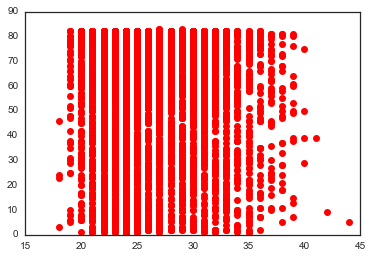

In [590]:
plt.plot(Score_all['Age'], Score_all['G'],'ro')

In [481]:
Games=np.zeros(24)
for i in range(19,43):
    Games[i-19]=Score_all.groupby('Age')['G'].get_group(str(i)).mean()

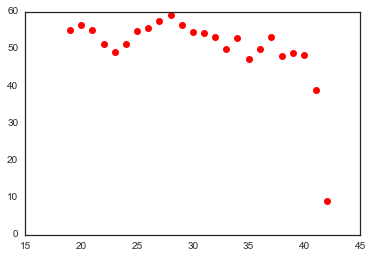

In [484]:
plt.plot(np.arange(19,43),Games,'ro')

In [730]:
Age_Score_12=pd.read_csv('./raw-data/11-12Per100Pos_stats.csv')[["Player", "Age", "PTS\\"]].drop_duplicates('Player')
Age_Score_12['PTS\'] = Age_Score_12['PTS'].map(lambda x: Str2float(x))
Age_Score_12 = Age_Score_12[Age_Score_12['PTS'].map(lambda x: type(x) is float)]

In [729]:
Age_Score_13=pd.read_csv('./raw-data/12-13Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_13['PTS'] = Age_Score_13['PTS'].map(lambda x: Str2float(x))
Age_Score_13 = Age_Score_13[Age_Score_13['PTS'].map(lambda x: type(x) is float)]

In [413]:
Age_Score_14=pd.read_csv('./raw-data/13-14Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_14['PTS'] = Age_Score_14['PTS'].map(lambda x: Str2float(x))
Age_Score_14 = Age_Score_14[Age_Score_14['PTS'].map(lambda x: type(x) is float)]

In [411]:
Age_Score_15=pd.read_csv('./raw-data/14-15Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_15['PTS'] = Age_Score_15['PTS'].map(lambda x: Str2float(x))
Age_Score_15 = Age_Score_15[Age_Score_15['PTS'].map(lambda x: type(x) is float)]

In [412]:
Age_Score_16=pd.read_csv('./raw-data/15-16Per100Pos_stats.csv')[["Player", "Age", "PTS"]].drop_duplicates('Player')
Age_Score_16['PTS'] = Age_Score_16['PTS'].map(lambda x: Str2float(x))
Age_Score_16 = Age_Score_16[Age_Score_16['PTS'].map(lambda x: type(x) is float)]

In [405]:
Score_all=pd.concat([Age_Score_13, Age_Score_14, Age_Score_15])

# Time series data analysis

# Model player's condition with 1st and 2nd order Markov Model
Once we chose players who should be in a team, we have to chose players who will be on the game today. Our player selection to construct a team has benn based on "Long term achievement" learnt from past years and haven't reflected current player's recent condition. 

Here we first learn each player's scoring pattern from past data using first order Markov Model. Some players score well in theree games in a row and will be in bad condition for three games after. Other players may score well every other game.

This is the simplest way of estimating how much does the player score in next game, based on a result of last game.




1560


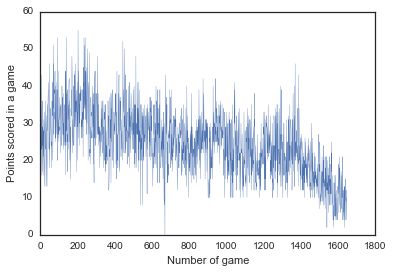

In [759]:
# First import Kareem's "Points per game" data from 1969-1989 
Scores        = pd.read_csv('./raw-data/Kareem_All_GameLog.csv')[["PTS"]].replace('Did Not Play','0')
Scores['PTS'] = Scores['PTS'].map(lambda x: Str2float(x))
Scores        = Scores[ Scores['PTS'].map(lambda x: type(x) is float)]
# Total length of the data set
print len( Scores )
# Plot time series of scores
plt.plot(Scores,lw=0.3)
plt.xlabel('Number of game')
plt.ylabel('Points scored in a game')

# 1st order Markov Model
To begin with, let's start with 1st order Markov Model, in which we estimate the result of this game only based on the last game.

### Pros
The good thing about this first order Markov Model is that, we can create reasonable transition matrix with small data sets. Each NBA player plays in 82 games at most and for example if we use 2 years of data which is around 160, and classify player's conditoin with 5 levels, total elements of transitoin matrix becomes 25. Given 160 data, 25 matrix is already at the border to have reliability. If we want to go higher order, we have to construct bigger matrix and in which case we don't have enough data.

In [654]:
# Change Scores into numpy array
Scores = np.array(Scores['PTS']).astype(float)
# States
States = np.zeros( len(Scores) )

train_start = 300
train_end   = 1000
test_start  = 1000
test_end    = 1200

# Mean of scores
MeanScore = np.mean(Scores[ train_start : train_end ])
# Variance of scores
StdScore  = np.std(Scores[ train_start : train_end ])

print 'Mean of score is ',     MeanScore
print 'Standard deviation of score is ', StdScore

Mean of score is  26.1985714286
Standard deviation of score is  7.00381514109


In [655]:
PlusVar = MeanScore + 0.55*StdScore
MinusVar= MeanScore - 0.55*StdScore

print PlusVar, MeanScore, MinusVar

30.0506697562 26.1985714286 22.346473101


In [656]:
for i in range( len(States) ):
    # if a player score more than "average + Var/2", the player is in the best condition
    if PlusVar    <= Scores[i]:
        States[i] = 3
    
    # if a player score more than "average" but less than "average + Var/2", the player is in the good condition
    elif MeanScore<= Scores[i] < PlusVar:
        States[i] = 2
    
    # if a player score less than "average" but more than "average - Var/2", the player is in the worse condition
    elif MinusVar <= Scores[i] < MeanScore: 
        States[i] = 1

    # if a player score less than "average - Var/2", 
    elif Scores[i] < MinusVar:
        States[i] = 0

# We train 1st order transition matrix from first 900 matches
States_train = States[ train_start : train_end ]
# We test prediction  ability with 900-1000 data
States_test  = States[ test_start : test_end ]
    
Tmatrix1 = np.zeros([4,4])

# Learn from training data to construt transition matrix
for i in range(0,len(States_train)-1):
    Tmatrix1[ States_train[i] ][ States_train[i+1] ] += 1
print Tmatrix1
print np.sum( Tmatrix1[0] )/np.sum( Tmatrix1 )
print np.sum( Tmatrix1[1] )/np.sum( Tmatrix1 )
print np.sum( Tmatrix1[2] )/np.sum( Tmatrix1 )
print np.sum( Tmatrix1[3] )/np.sum( Tmatrix1 )


[[ 73.  42.  44.  50.]
 [ 51.  27.  38.  29.]
 [ 44.  40.  33.  45.]
 [ 42.  36.  46.  59.]]
0.298998569385
0.207439198856
0.231759656652
0.261802575107


/Users/hidenori/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [657]:
Correct = 0
Wrong   = 0

for i in range(0,len(States_test)-1):
    # Always predict future by taking most probable transition from transition matrix
    if np.argmax( Tmatrix[ int( States_test[i] ) ] ) == States_test[i+1]:
        # If the prediction is correct
        Correct +=1
        # If the prediction is not correct
    else:
        Wrong += 1
print 'Probability for getting next State right is ', float( Correct )/(Correct+Wrong)

Probability for getting next State right is  0.100502512563


# 2nd order Markov Model
To find longer term correlatoin, we use 2nd order Markov Model which has $25 \times 25$ transition matrix. 

In [658]:
# Construct second order transition matrix
Tmatrix2=np.zeros([16,16])
for i in range(len(States_train)-1):
    Tmatrix2[ 4*States_train[i-1] + States_train[i] ][ 4*States_train[i] + States_train[i+1] ] +=1
# normalize
for i in range(16):
    if Tmatrix2[i].sum() != 0:
        Tmatrix2[i]=Tmatrix2[i]#/Tmatrix2[i].sum()
print Tmatrix2

[[ 32.  10.  13.  18.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  18.   7.  10.   7.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  15.  13.   9.   8.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.  11.
   11.  18.]
 [ 15.  10.  14.  12.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  10.   3.   8.   6.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  10.  12.  10.   6.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   8.
    7.   8.]
 [ 13.   9.   9.  12.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.  14.   7.  12.   7.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   8.   4.  10.  11.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10

/Users/hidenori/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [670]:
Correct = 0
Wrong   = 0

for i in range(1,len(States_test)-1):
    if np.mod( np.argmax( Tmatrix2[ int( States_test[i-1]*4 + States_test[i] ) ] ), 4) == States_test[i+1]:
        Correct +=1
    else:
        Wrong += 1
print "The probability of giving a right answer is " ,float( Correct )/(Correct+Wrong)

The probability of giving a right answer is  0.510101010101


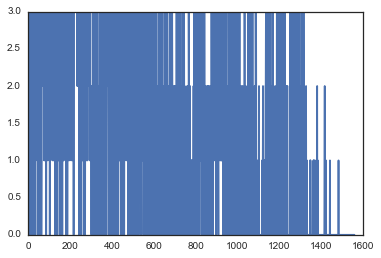

In [671]:
plt.plot( States )

# Time Series Analysis in Longer Scale:
In the previous section we analyzed "condition" of each player using 2nd order Markov model, which takes results from recent two games to predict result for "next game".

When selecting the best member, another important factor when determining the team member is how do the player do in the "next year".

These trend can be partially affected by the player's age.

For example, some young player may be in the process of growing and the scores getting better and better every year, in which case we can expect for him to do better in comming year.

On the other hand, some great player's scores may be getting worse due to several reasons such as injury or aging.

To analyze these time series data to predict future out come, here we analyze "Point Per Game" data of "Kareem Abdul-Jabbar" who played from 1969 to 1989.

Refering to Lecture 17 "TimeSeries", we conduct inference and prediction with the data


# Time Series Analysis in Longer Scale:
In the previous section, we analyzed "condition" of each player using 2nd order Markov model, which takes results from recent two games to predict result for "next game".

Howevery, fans also say "this player is not doing well these 10 games or this entire year".

To capture these trends, we first average results of every 20 games and use techniques for time series analysis to predict out come from next 20-30 games.

First, we plotted "Autocorrelation" and "Partial Autocorrelation below".

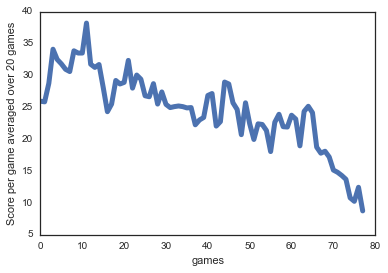

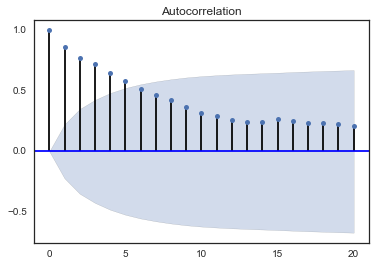

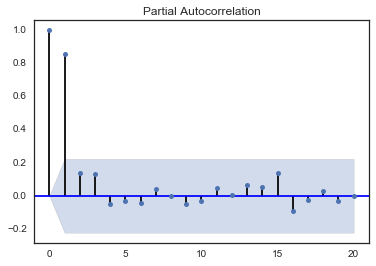

In [703]:
# In order to see the long term trend
games=20
AveScores=np.zeros(len(Scores)/games)
i=0
j=0
for j in range(len(AveScores)):
    AveScores[j]=np.sum(Scores[i:i+games])/games
    i+=games
    j+=1
plt.plot(AveScores,lw='5')
plt.xlabel('games')
plt.ylabel('Score per game averaged over '+str(games)+' games')
tsaplots.plot_acf( AveScores  , lags=20);
tsaplots.plot_pacf( AveScores , lags=20);

# 

array([ 362.33090103,  303.07262538,  304.27572463,  300.52886309,
        302.52808009,  304.45775462,  306.26835366,  307.92128812,
        309.64328045,  311.63317628,  313.53787797,  315.53709068,
        317.32569677,  319.00583173,  321.0053714 ])

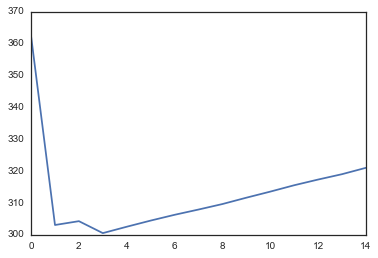

In [731]:
# We use first 60 data to train 
AveScores_train = AveScores[:63]
AveScores_test  = AveScores[63:]

#
aics=np.zeros(15)
orders=range(15)
fits=[]
for j in orders:
    fit=sm.tsa.ARMA( AveScores_train , (j,0)).fit(method="mle")
    fits.append(fit)
    aics[j]=fit.aic
plt.plot(orders, aics);
aics

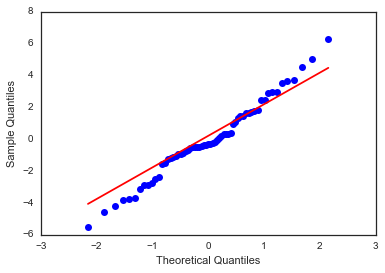

In [732]:
from statsmodels.graphics.api import qqplot
qqplot(fits[10].resid,line='q');

In [733]:
fits[10].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:                    ARMA(10, 0)   Log Likelihood                -144.769
Method:                           mle   S.D. of innovations              2.381
Date:                Tue, 03 May 2016   AIC                            313.538
Time:                        11:14:24   BIC                            339.255
Sample:                             0   HQIC                           323.653
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         25.7328      2.219     11.594      0.000        21.383    30.083
ar.L1.y        0.6836      0.129      5.300      0.000         0.431     0.936
ar.L2.y       -0.1078      0.157     -0.688      0.494        -0.415     0.199
ar.L3.y        0.3171      0.156      2.038      0.047         0.012     0.622
ar.L4.y       -0.0577      0.164     -0.352      0.726        -0.379     0.263
ar.L5.y        0.0541      0.163      0.332      0.741        -0.265     0.373
ar.L6.y       -0.1000      0.161     -0.619      0.538        -0.416     0.216
ar.L7.y        0.0474      0.161      0.294      0.770        -0.269     0.364
ar.L8.y        0.0786      0.161      0.490      0.626        -0.236     0.393
ar.L9.y        0.0111      0.161      0.069      0.945        -0.304     0.326
ar.L10.y      -0.0429      0.139     -0.309      0.759        -0.315     0.229
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0735           -0.0000j            1.0735           -0.0000
AR.2             1.0146           -0.8985j            1.3553           -0.1154
AR.3             1.0146           +0.8985j            1.3553            0.1154
AR.4             1.6465           -0.0000j            1.6465           -0.0000
AR.5             0.0431           -1.2211j            1.2219           -0.2444
AR.6             0.0431           +1.2211j            1.2219            0.2444
AR.7            -0.8226           -1.0895j            1.3652           -0.3529
AR.8            -0.8226           +1.0895j            1.3652            0.3529
AR.9            -1.4657           -0.6592j            1.6071           -0.4327
AR.10           -1.4657           +0.6592j            1.6071            0.4327
------------------------------------------------------------------------------
"""

# Result of prediction
Here we show the result of prediction below.
The plot shows that we can make reasonable prediction for near future. (comming 20-30 games)

This way of prediciton can be useful when choseing players to construct a team in Fantasy football.

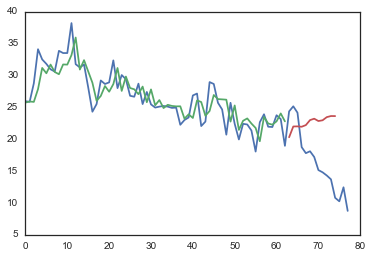

In [738]:
index_rem=np.arange(63,75,1)
predicts=fits[10].predict(start=63, end=74)
in_predicts = fits[10].predict()

plt.plot(Ave)
plt.plot(in_predicts)
plt.plot(index_rem, predicts)

# Effect of aging
How do the aging matter?

In [743]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

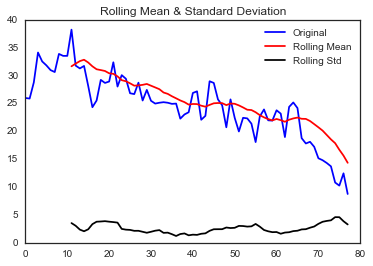

Results of Dickey-Fuller Test:
Test Statistic                  0.296385
p-value                         0.977178
#Lags Used                      2.000000
Number of Observations Used    75.000000
Critical Value (5%)            -2.900925
Critical Value (1%)            -3.520713
Critical Value (10%)           -2.587781
dtype: float64


In [745]:
test_stationarity(AveScores)

AttributeError: 'numpy.ndarray' object has no attribute 'shift'

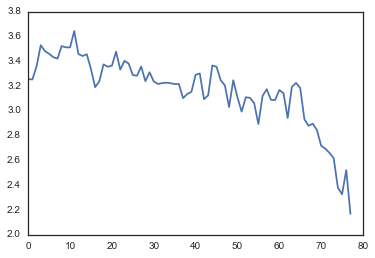

In [764]:
# AR Model
ts = AveScores
ts_log = np.log(ts)
plt.plot(ts_log)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [763]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

NameError: name 'ts_log_diff' is not defined

In [766]:
ts = Series(randn(1000), index = DateRange('2000/1/1', periods = 1000))
ts = ts.cumsum()

ts.plot(style = '<--')
rolling_mean(ts, 60).plot(style='--', c='r')
rolling_mean(ts, 180).plot(style='--', c='b')

plt.show()

NameError: name 'Series' is not defined

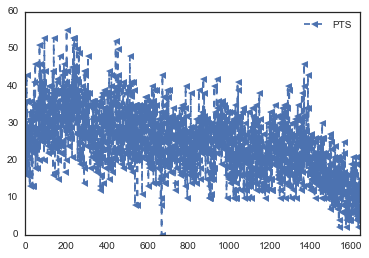

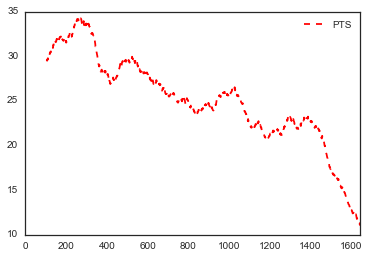

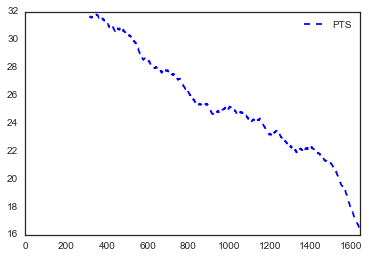

In [773]:
from pandas import *
ts = Scores
ts.plot(style = '<--')
rolling_mean(ts, 100).plot(style='--', c='r')
rolling_mean(ts, 300).plot(style='--', c='b')

In [779]:
from scikits.statsmodels.tsa import stattools
acf = stattools.acf(np.array(ts), 50)		#ACF算出
plt.bar(range(len(acf)), acf, width = 0.01)

ImportError: No module named scikits.statsmodels.tsa